# Story - 5 : What Is The Effect Of The Earth's Temperature on Cyclonic Storms?

### Brandon Chung
### 11/12/2025

## Introduction

In this analysis I will be exploring how the Earth's temperature affected cyclonic storm frequency and intensity over the past 25 years.

In [70]:
# Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


## Data Preprocessing

In [71]:
# Temperature Data sourced from NCEI NOAA at
# https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/tavg/12/8/2000-2025

# Load Temperature Anomaly Data from github raw csv url

url = "https://raw.githubusercontent.com/Chung-Brandon/608-Knowledge-and-Visual-Analytics/refs/heads/main/temperature.csv"
temperature_data = pd.read_csv(url, skiprows=3)

# Renaming Anomaly column to 'Temperature Anomaly'
temperature_data = temperature_data.rename(columns={'Anomaly': 'Temperature Anomaly'})

# Temperature anomalies are the difference between that year's temperature and the average temperature over a baseline period (1901-2000 average)
temperature_data.head()



,Year,Temperature Anomaly
0,1999,0.44
1,2000,0.43
2,2001,0.47
3,2002,0.63
4,2003,0.59


In [72]:
# Tornado Data sourced from NCEI NOAA
# https://www.ncei.noaa.gov/access/monitoring/tornadoes/time-series/12/0?fatalities=true

url_storms = "https://raw.githubusercontent.com/Chung-Brandon/608-Knowledge-and-Visual-Analytics/refs/heads/main/tornado_data.csv"
tornado_data = pd.read_csv(url_storms, skiprows=3)
tornado_data.head()

,Date,Tornadoes,Fatalities
0,195012,201,70
1,195101,196,69
2,195102,186,25
3,195103,171,24
4,195104,182,14


In [73]:
# Cleaning tornado data
# Extracting year from 'Date' column
tornado_data['Year'] = tornado_data['Date'].astype(str).str[:4]

# Removing date column 
tornado_data = tornado_data.drop(columns=['Date'])

# Removing years not needed for analysis outside of 1999 - 2024
tornado_data = tornado_data[(tornado_data['Year'] >= '1999') & (tornado_data['Year'] <= '2024')]

# Converting tornado counts to numeric
tornado_data['Tornadoes'] = pd.to_numeric(tornado_data['Tornadoes'], errors='coerce')

# Grouping by year
tornado_data = tornado_data.groupby('Year').agg({'Tornadoes': 'sum', 'Fatalities': 'sum'}).reset_index()

# Renaming Fatalities to tornado fatalities
tornado_data = tornado_data.rename(columns={'Fatalities': 'Tornado Fatalities'})

# Converting year to numeric
tornado_data['Year'] = pd.to_numeric(tornado_data['Year'], errors='coerce')

In [74]:
tornado_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                26 non-null     int64
 1   Tornadoes           26 non-null     int64
 2   Tornado Fatalities  26 non-null     int64
dtypes: int64(3)
memory usage: 756.0 bytes


In [75]:
# Cyclone and hurricane statistics sourced from Colorado State University at
# https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=global

# Load cyclone and hurricane data
url_cyclones = "https://raw.githubusercontent.com/Chung-Brandon/608-Knowledge-and-Visual-Analytics/refs/heads/main/Cyclone_Stats.csv"
cyclone_data = pd.read_csv(url_cyclones)

# Rename first column to 'Year'
if cyclone_data.columns[0] != 'Year':
    cyclone_data = cyclone_data.rename(columns={cyclone_data.columns[0]: 'Year'})

# Remove years outside of 1999 - 2024
cyclone_data = cyclone_data[(cyclone_data['Year'] >= 1999) & (cyclone_data['Year'] <= 2024)]

cyclone_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 19 to 44
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        26 non-null     int64  
 1   Named Storms                26 non-null     int64  
 2   Named Storm Days            26 non-null     float64
 3   Hurricanes                  26 non-null     int64  
 4   Hurricanes Days             26 non-null     float64
 5   Cat. 3+ Hurricanes          26 non-null     int64  
 6   Cat. 3+ Hurricanes Days     26 non-null     float64
 7   Accumulated Cyclone Energy  26 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 1.8 KB


In [76]:
# Merging temperature, cyclone, and tornado data
merged_data = pd.merge(temperature_data, cyclone_data, on='Year', how='inner')
merged_data = pd.merge(merged_data, tornado_data, on='Year', how='inner')

merged_data.head()

,Year,Temperature Anomaly,Named Storms,Named Storm Days,Hurricanes,Hurricanes Days,Cat. 3+ Hurricanes,Cat. 3+ Hurricanes Days,Accumulated Cyclone Energy,Tornadoes,Tornado Fatalities
0,1999,0.44,74,317.5,39,135.50,21,46.50,606.4,17529,1148
1,2000,0.43,90,392.5,45,160.50,20,39.25,677.3,12907,605
2,2001,0.47,88,373.5,51,162.75,24,38.50,672.4,12854,408
3,2002,0.63,82,384.5,41,171.50,27,69.50,812.0,12402,413
4,2003,0.59,85,418.0,50,175.00,25,68.00,833.0,15823,925


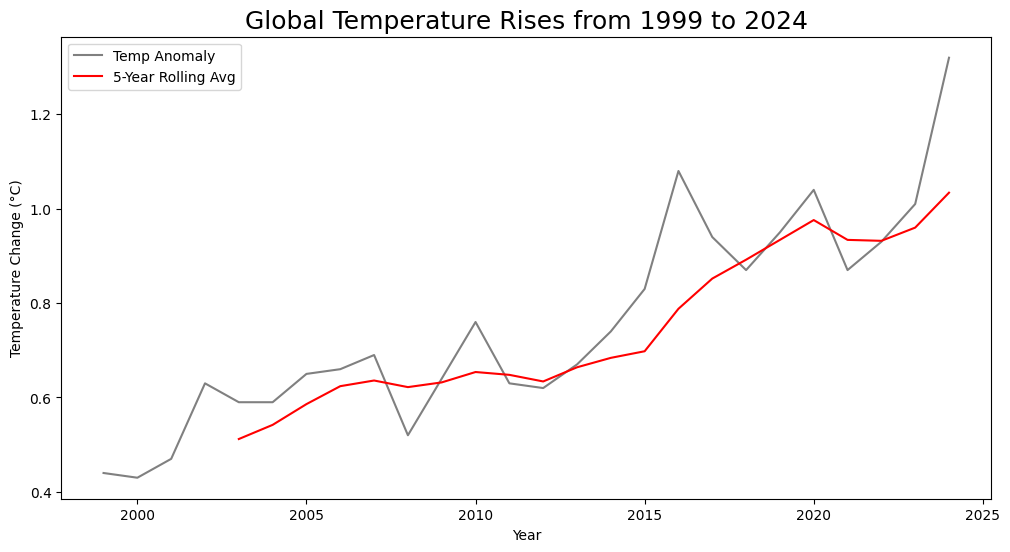

In [88]:
# Visualizing the trend of temperature anomalies over time

merged_data['Smoothed_Temp'] = merged_data['Temperature Anomaly'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['Temperature Anomaly'], label='Temp Anomaly', color='gray')
plt.plot(merged_data['Year'], merged_data['Smoothed_Temp'], label='5-Year Rolling Avg', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.title('Global Temperature Rises from 1999 to 2024', fontsize=18)
plt.legend()
plt.show()


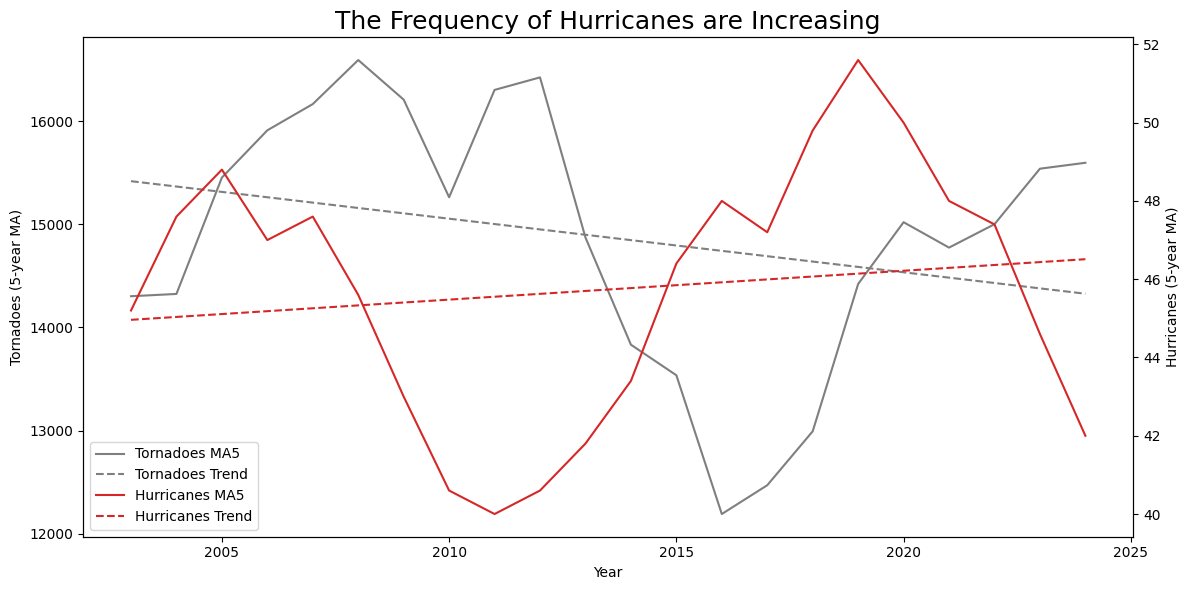

In [80]:
# visualizing the trend of Tornadoes and Named Storms, using their 5 year moving averages over time and a double y-axis

# Calculate 5-year moving averages
merged_data['Tornadoes_MA5'] = merged_data['Tornadoes'].rolling(window=5).mean()
merged_data['Hurricanes_MA5'] = merged_data['Hurricanes'].rolling(window=5).mean()

# Drop NaNs from Tornadoes MA
tornado_df = merged_data[['Year', 'Tornadoes_MA5']].dropna()
X1 = tornado_df['Year'].values.reshape(-1, 1)
y1 = tornado_df['Tornadoes_MA5'].values
model1 = LinearRegression().fit(X1, y1)
trend1 = model1.predict(X1)

# Drop NaNs from Hurricanes MA
hurricane_df = merged_data[['Year', 'Hurricanes_MA5']].dropna()
X2 = hurricane_df['Year'].values.reshape(-1, 1)
y2 = hurricane_df['Hurricanes_MA5'].values
model2 = LinearRegression().fit(X2, y2)
trend2 = model2.predict(X2)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Tornadoes
ax1.set_xlabel('Year')
ax1.set_ylabel('Tornadoes (5-year MA)')  # No color here
ax1.plot(merged_data['Year'], merged_data['Tornadoes_MA5'], color='tab:gray', label='Tornadoes MA5')
ax1.plot(X1.flatten(), trend1, color='tab:gray', linestyle='--', label='Tornadoes Trend')
ax1.tick_params(axis='y')  # No labelcolor

# Hurricanes
ax2 = ax1.twinx()
ax2.set_ylabel('Hurricanes (5-year MA)')  # No color here
ax2.plot(merged_data['Year'], merged_data['Hurricanes_MA5'], color='tab:red', label='Hurricanes MA5')
ax2.plot(X2.flatten(), trend2, color='tab:red', linestyle='--', label='Hurricanes Trend')
ax2.tick_params(axis='y')  # No labelcolor

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left')

plt.title('The Frequency of Hurricanes are Increasing', fontsize = 18)
fig.tight_layout()
plt.show()





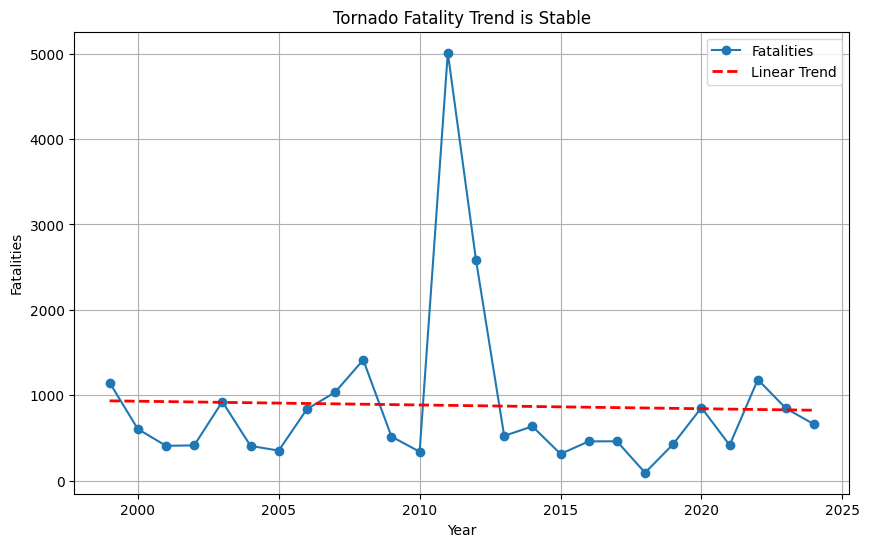

In [ ]:
# Visualization of tornado fatalities over time
# Drop NaNs to avoid errors
fatal_df = merged_data[['Year', 'Tornado Fatalities']].dropna()

# Prepare data for regression
X = fatal_df['Year'].values.reshape(-1, 1)
y = fatal_df['Tornado Fatalities'].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fatal_df['Year'], fatal_df['Tornado Fatalities'], marker='o', linestyle='-', label='Fatalities')
plt.plot(fatal_df['Year'], trend, color='red', linestyle='--', linewidth=2, label='Linear Trend')
plt.title('Tornado Fatality Trend is Stable')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.grid(True)
plt.legend()
plt.show()


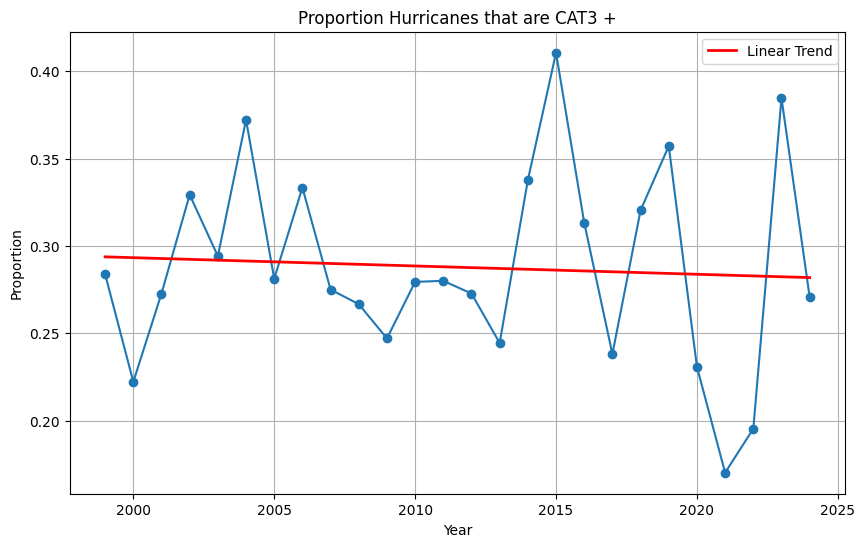

In [ ]:
# Visualizing the trend of the proportion of Named Storms which are CAT3 hurricanes
merged_data['CAT3_Proportion'] = merged_data['Cat. 3+ Hurricanes'] / merged_data['Named Storms']

X = merged_data['Year'].values.reshape(-1, 1)
y = merged_data['CAT3_Proportion'].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['CAT3_Proportion'], marker='o', linestyle='-')
plt.plot(merged_data['Year'], trend, color='red', linewidth=2, label='Linear Trend')
plt.title('Proportion Hurricanes that are CAT3 +')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.grid(True)
plt.legend()
plt.show()


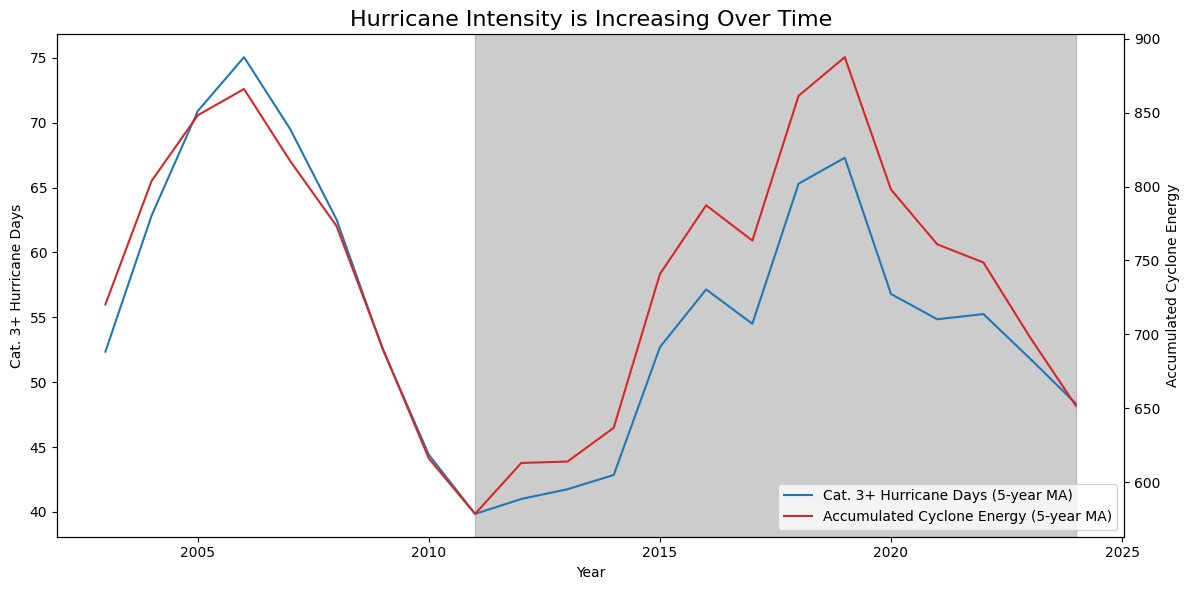

In [87]:
# Visualizing the trend of Cat. 3+ Hurricanes Days and Accumulated Cyclone Energy over time with a double y axis

merged_data['Cat3_Days_MA5'] = merged_data['Cat. 3+ Hurricanes Days'].rolling(window=5).mean()
merged_data['ACE_MA5'] = merged_data['Accumulated Cyclone Energy'].rolling(window=5).mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# First line (Cat. 3+ Hurricane Days)
line1, = ax1.plot(merged_data['Year'], merged_data['Cat3_Days_MA5'],
                  color='tab:blue', label='Cat. 3+ Hurricane Days (5-year MA)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cat. 3+ Hurricane Days')
ax1.tick_params(axis='y')

# Shade 2011–2024
ax1.axvspan(2011, 2024, color='gray', alpha=0.4)

# Second line (Accumulated Cyclone Energy)
ax2 = ax1.twinx()
line2, = ax2.plot(merged_data['Year'], merged_data['ACE_MA5'],
                  color='tab:red', label='Accumulated Cyclone Energy (5-year MA)')
ax2.set_ylabel('Accumulated Cyclone Energy')
ax2.tick_params(axis='y')

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower right')

plt.title('Hurricane Intensity is Increasing Over Time', fontsize=16)
fig.tight_layout()
plt.show()




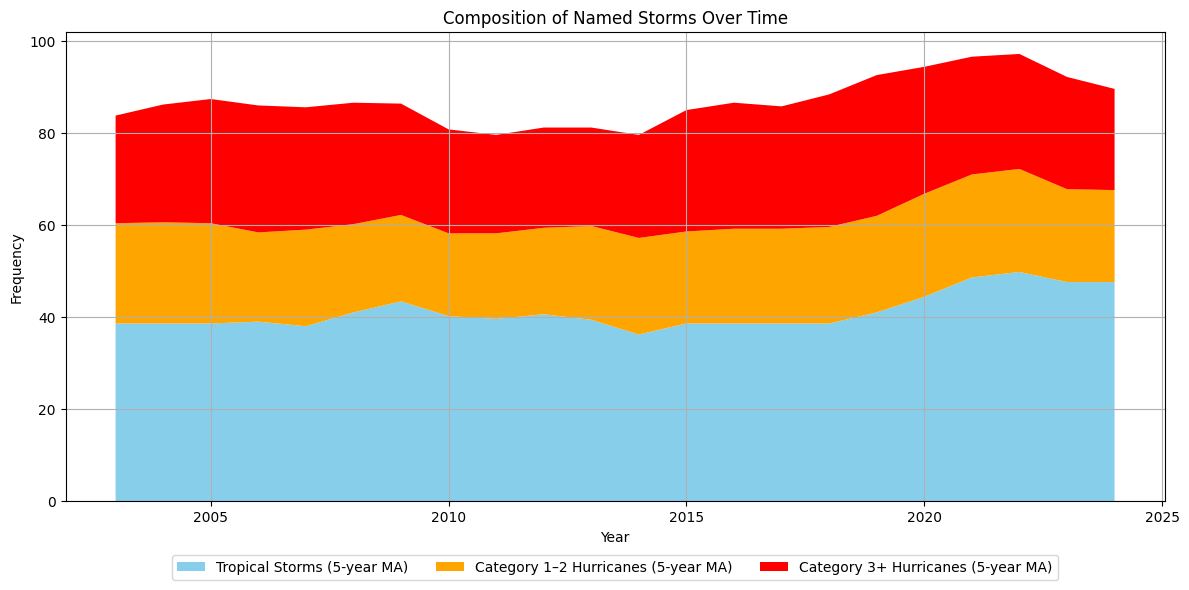

In [ ]:
# Visualizing trend of Named Storms, Hurricanes, and CAT 3 + Hurricanes over time

merged_data['NamedStorms_MA5'] = merged_data['Named Storms'].rolling(window=5).mean()
merged_data['Cat3_MA5'] = merged_data['Cat. 3+ Hurricanes'].rolling(window=5).mean()

# Compute non-overlapping layers
merged_data['TropicalStorms_MA5'] = merged_data['NamedStorms_MA5'] - merged_data['Hurricanes_MA5']
merged_data['OtherHurricanes_MA5'] = merged_data['Hurricanes_MA5'] - merged_data['Cat3_MA5']

# Drop rows with NaNs
stacked_df = merged_data.dropna(subset=['TropicalStorms_MA5', 'OtherHurricanes_MA5', 'Cat3_MA5'])

# Prepare data
years = stacked_df['Year']
tropical = stacked_df['TropicalStorms_MA5']
other_hurricanes = stacked_df['OtherHurricanes_MA5']
cat3 = stacked_df['Cat3_MA5']

# Plot corrected stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(years,
              tropical,
              other_hurricanes,
              cat3,
              labels=['Tropical Storms (5-year MA)', 'Category 1–2 Hurricanes (5-year MA)', 'Category 3+ Hurricanes (5-year MA)'],
              colors=['skyblue', 'orange', 'red'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Composition of Cyclonic Storms')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.grid(True)
plt.show()



In [ ]:
merged_data.head()

,Year,Temperature Anomaly,Named Storms,Named Storm Days,Hurricanes,Hurricanes Days,Cat. 3+ Hurricanes,Cat. 3+ Hurricanes Days,Accumulated Cyclone Energy,Tornadoes,Tornado Fatalities,Smoothed_Temp,Tornadoes_MA5,Hurricanes_MA5,CAT3_Proportion,Hurricane_Days_MA5,ACE_MA5,NamedStorms_MA5,Cat3_MA5
0,1999,0.44,74,317.5,39,135.50,21,46.50,606.4,17529,1148,NaN,NaN,NaN,0.283784,NaN,NaN,NaN,NaN
1,2000,0.43,90,392.5,45,160.50,20,39.25,677.3,12907,605,NaN,NaN,NaN,0.222222,NaN,NaN,NaN,NaN
2,2001,0.47,88,373.5,51,162.75,24,38.50,672.4,12854,408,NaN,NaN,NaN,0.272727,NaN,NaN,NaN,NaN
3,2002,0.63,82,384.5,41,171.50,27,69.50,812.0,12402,413,NaN,NaN,NaN,0.329268,NaN,NaN,NaN,NaN
4,2003,0.59,85,418.0,50,175.00,25,68.00,833.0,15823,925,0.512,14303.0,45.2,0.294118,161.05,720.22,83.8,23.4


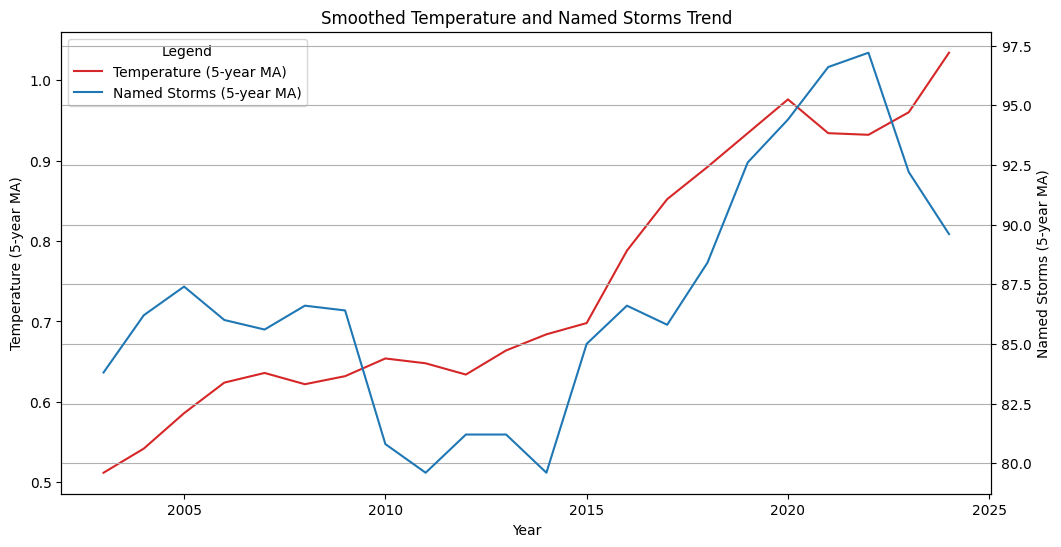

In [ ]:
# Visualizing smoothed temp and named storms trend in one plot with a double y axis


fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature line (red)
line1, = ax1.plot(merged_data['Year'], merged_data['Smoothed_Temp'], color='tab:red', label='Temperature (5-year MA)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (5-year MA)')

# Named Storms line (blue)
ax2 = ax1.twinx()
line2, = ax2.plot(merged_data['Year'], merged_data['NamedStorms_MA5'], color='tab:blue', label='Named Storms (5-year MA)')
ax2.set_ylabel('Named Storms (5-year MA)')

# Combine legend entries from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', title='Legend')

plt.title('Smoothed Temperature and Named Storms Trend')
plt.grid(True)
plt.show()

